# Classification

In [23]:
from collections import Counter

import pandas as pd
import numpy as np

import pickle as pk

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

## Data

In [2]:
movies = pd.read_csv('../data/popular_10000_movies/movies_dataset_CLEAN.csv', index_col='id')
movies.head()

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
385687,"[28, 80, 53]",Over many missions and against impossible odds...,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller","[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de...","[{'id': 9663, 'name': 'sequel'}, {'id': 9748, ..."
697843,"[28, 53]",Tasked with extracting a family who is at the ...,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller","[{'cast_id': 74568, 'name': 'Chris Hemsworth',...","[{'crew_id': 950, 'name': 'Pietro Scalia', 'de...","[{'id': 3070, 'name': 'mercenary'}, {'id': 966..."
603692,"[28, 53, 80]","With the price on his head ever increasing, Jo...",1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime","[{'cast_id': 6384, 'name': 'Keanu Reeves', 'ch...","[{'crew_id': 3615, 'name': 'Manfred Banach', '...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
569094,"[28, 12, 16, 878]","After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction","[{'cast_id': 587506, 'name': 'Shameik Moore', ...","[{'crew_id': 7624, 'name': 'Stan Lee', 'depart...","[{'id': 2858, 'name': 'sacrifice'}, {'id': 328..."
502356,"[16, 10751, 12, 14, 35]","While working underground to fix a water main,...",1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy","[{'cast_id': 73457, 'name': 'Chris Pratt', 'ch...","[{'crew_id': 70851, 'name': 'Jack Black', 'dep...","[{'id': 282, 'name': 'video game'}, {'id': 690..."


In [34]:
movies.drop(['genre_ids', 'overview', 'cast', 'crew', 'keywords'], axis=1, inplace=True)
movies.head()

,popularity,release_date,title,vote_average,vote_count,genres
id,,,,,,
385687,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller"
697843,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller"
603692,1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime"
569094,2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction"
502356,1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy"


In [48]:
uk = pd.read_csv('data/unique_keywords_genres_count_with_labels_SHORTED_VERSION_label_encoder.csv', index_col=0)
uk.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,label,label_encoder
car crash,20,10,1,16,11,0,15,4,5,0,...,1,6,3,9,1,25,0,0,Thriller,233
liposuction,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,"Comedy, Drama, Fantasy",82
stasis,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,Science Fiction,231
giant vegetable,0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Animation,63
monster,48,43,22,41,0,0,17,27,50,0,...,1,12,0,55,8,29,1,0,Horror,204


In [49]:
uk.drop(['label', 'label_encoder'], axis=1, inplace=True)

In [46]:
ua = pd.read_csv('data/unique_actors_genres_count_with_labels_SHORTED_VERSION_label_encoder.csv', index_col=0)
ua.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,label,label_encoder
Sheldon Jett,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,"Comedy, Romance, Action",138
Jocelyn Ott,0,1,0,1,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,"Adventure, Comedy, Drama",61
Mel Archer,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,"Drama, Western, Action",253
Tony Aitken,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,"Drama, Romance, Action",234
J.K. Simmons,24,24,12,31,9,2,30,12,9,4,...,3,2,9,12,1,14,0,3,"Comedy, Drama, Action",117


In [47]:
ua.drop(['label', 'label_encoder'], axis=1, inplace=True)

In [45]:
ug = pd.read_csv('data/one-hot_genres_w_labels.csv', index_col='id')
ug.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,label,label_encoder
id,,,,,,,,,,,,,,,,,,,,,
385687,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,Thriller,16
697843,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,Thriller,16
603692,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,Thriller,16
569094,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,Animation,2
502356,0,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,Animation,2


In [44]:
keywords = pd.read_csv('data/keywords_list.csv', index_col='id')
keywords.head()

,keywords_list
id,
385687,"['sequel', 'revenge', 'racing', 'family', 'cars']"
697843,"['mercenary', 'sequel', 'rescue mission', 'lon..."
603692,"['new york city', 'martial arts', 'hitman', 's..."
569094,"['sacrifice', 'villain', 'comic book', 'sequel..."
502356,"['video game', 'gorilla', 'plumber', 'magic mu..."


In [43]:
cast = pd.read_csv('data/cast_list.csv', index_col='id')
cast.head()

,cast_list
id,
385687,"['Vin Diesel', 'Michelle Rodriguez', 'Tyrese G..."
697843,"['Chris Hemsworth', 'Golshifteh Farahani', 'Ad..."
603692,"['Keanu Reeves', 'Donnie Yen', 'Bill Skarsgård..."
569094,"['Shameik Moore', 'Hailee Steinfeld', 'Brian T..."
502356,"['Chris Pratt', 'Anya Taylor-Joy', 'Charlie Da..."


In [73]:
keywords.shape, cast.shape, movies.shape

((9144, 1), (9133, 1), (9144, 7))

In [84]:
movies = movies.loc[cast.index]
keywords = keywords.loc[cast.index]

In [85]:
keywords.shape, cast.shape, movies.shape

((9133, 1), (9133, 1), (9133, 6))

In [93]:
ug.shape

(9144, 21)

In [94]:
ug = ug.loc[cast.index]

## Find Class

In [8]:
_id = 385687
id_385687 = movies.loc[_id]
id_385687.to_frame()

,385687
genre_ids,"[28, 80, 53]"
overview,Over many missions and against impossible odds...
popularity,4654.279
release_date,2023-05-17
title,Fast X
vote_average,7.3
vote_count,2093
genres,"Action, Crime, Thriller"
cast,"[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha..."
crew,"[{'crew_id': 1302, 'name': 'Susie Figgis', 'de..."


In [9]:
_id_uk = uk.loc[keywords.loc[_id].to_list()[0][2:-2].split("', '")]

In [10]:
_id_ua = ua.loc[cast.loc[_id].to_list()[0][2:-2].split("', '")]

In [11]:
_id_uk_cs = cosine_similarity(_id_uk.to_numpy(), _id_uk.to_numpy())
_id_ua_cs = cosine_similarity(_id_ua.to_numpy(), _id_ua.to_numpy())

In [12]:
_id_uk_cs = pd.DataFrame(index=_id_uk.index, columns=_id_uk.index, data=_id_uk_cs)
_id_uk_cs

,sequel,revenge,racing,family,cars
sequel,1.000000,0.801752,0.767978,0.769497,0.541304
revenge,0.801752,1.000000,0.673981,0.585817,0.842520
racing,0.767978,0.673981,1.000000,0.833432,0.411476
family,0.769497,0.585817,0.833432,1.000000,0.252751
cars,0.541304,0.842520,0.411476,0.252751,1.000000


In [13]:
_id_ua_cs = pd.DataFrame(index=_id_ua.index, columns=_id_ua.index, data=_id_ua_cs)
_id_ua_cs

,Vin Diesel,Michelle Rodriguez,Tyrese Gibson,Ludacris,John Cena,Nathalie Emmanuel,Jordana Brewster,Sung Kang,Jason Momoa,Scott Eastwood,...,Miraj Grbić,Meadow Walker Thornton-Allan,Michael Irby,Shahir Figueira,Ben-Hur Santos,Debby Ryan,Josh Dun,Robert Bastens,Dwayne Johnson,Gal Gadot
Vin Diesel,1.000000,0.892341,0.905549,0.814513,0.720363,0.830141,0.814646,0.878983,0.890762,0.718139,...,0.832654,0.647955,0.650148,0.647955,0.812035,0.652025,0.647955,0.803926,0.929803,0.874258
Michelle Rodriguez,0.892341,1.000000,0.964832,0.937148,0.624580,0.946430,0.939393,0.978631,0.906544,0.809705,...,0.945516,0.880394,0.845123,0.880394,0.908007,0.647179,0.880394,0.905134,0.910127,0.904460
Tyrese Gibson,0.905549,0.964832,1.000000,0.888453,0.554823,0.899058,0.894775,0.976167,0.951741,0.826023,...,0.933782,0.803270,0.792594,0.803270,0.891569,0.577459,0.803270,0.906872,0.907851,0.929604
Ludacris,0.814513,0.937148,0.888453,1.000000,0.661849,0.871581,0.929758,0.914783,0.756984,0.815061,...,0.927536,0.882830,0.849946,0.882830,0.884652,0.703339,0.882830,0.826012,0.846969,0.823533
John Cena,0.720363,0.624580,0.554823,0.661849,1.000000,0.517826,0.621727,0.590740,0.586383,0.452831,...,0.645051,0.390702,0.383115,0.390702,0.717765,0.703131,0.390702,0.433766,0.821695,0.693296
Nathalie Emmanuel,0.830141,0.946430,0.899058,0.871581,0.517826,1.000000,0.890136,0.909300,0.819385,0.674621,...,0.900441,0.910980,0.799259,0.910980,0.880830,0.551487,0.910980,0.906367,0.826504,0.839705
Jordana Brewster,0.814646,0.939393,0.894775,0.929758,0.621727,0.890136,1.000000,0.905712,0.809076,0.808938,...,0.876118,0.841625,0.873828,0.841625,0.848875,0.623675,0.841625,0.831890,0.840398,0.798292
Sung Kang,0.878983,0.978631,0.976167,0.914783,0.590740,0.909300,0.905712,1.000000,0.921309,0.829628,...,0.934001,0.862044,0.839042,0.862044,0.899371,0.647035,0.862044,0.871796,0.902895,0.911407
Jason Momoa,0.890762,0.906544,0.951741,0.756984,0.586383,0.819385,0.809076,0.921309,1.000000,0.745290,...,0.865660,0.653701,0.677636,0.653701,0.838742,0.528546,0.653701,0.823829,0.921220,0.934233
Scott Eastwood,0.718139,0.809705,0.826023,0.815061,0.452831,0.674621,0.808938,0.829628,0.745290,1.000000,...,0.778633,0.642999,0.808539,0.642999,0.648537,0.559353,0.642999,0.667340,0.690358,0.671173


Text(0.5, 1.0, 'Cosine Similarity for keywords')

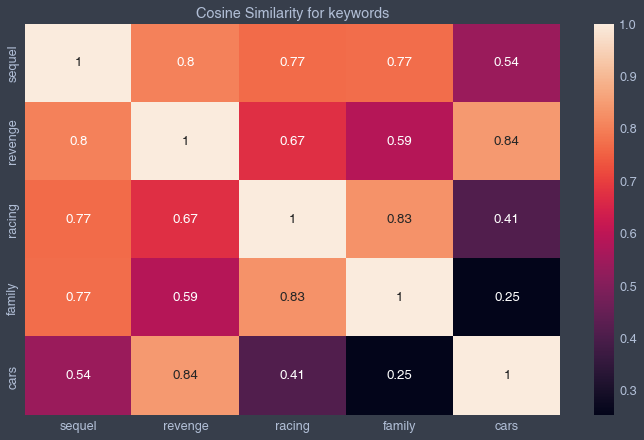

In [38]:
plt.figure()
sns.heatmap(_id_uk_cs, annot=True)
plt.title('Cosine Similarity for keywords')

In [41]:
_id_uk_cs.describe()

,sequel,revenge,racing,family,cars
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.776106,0.780814,0.737373,0.688299,0.609610
std,0.162810,0.159472,0.217580,0.285052,0.307377
min,0.541304,0.585817,0.411476,0.252751,0.252751
25%,0.767978,0.673981,0.673981,0.585817,0.411476
50%,0.769497,0.801752,0.767978,0.769497,0.541304
75%,0.801752,0.842520,0.833432,0.833432,0.842520
max,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Cosine Similarity for cast')

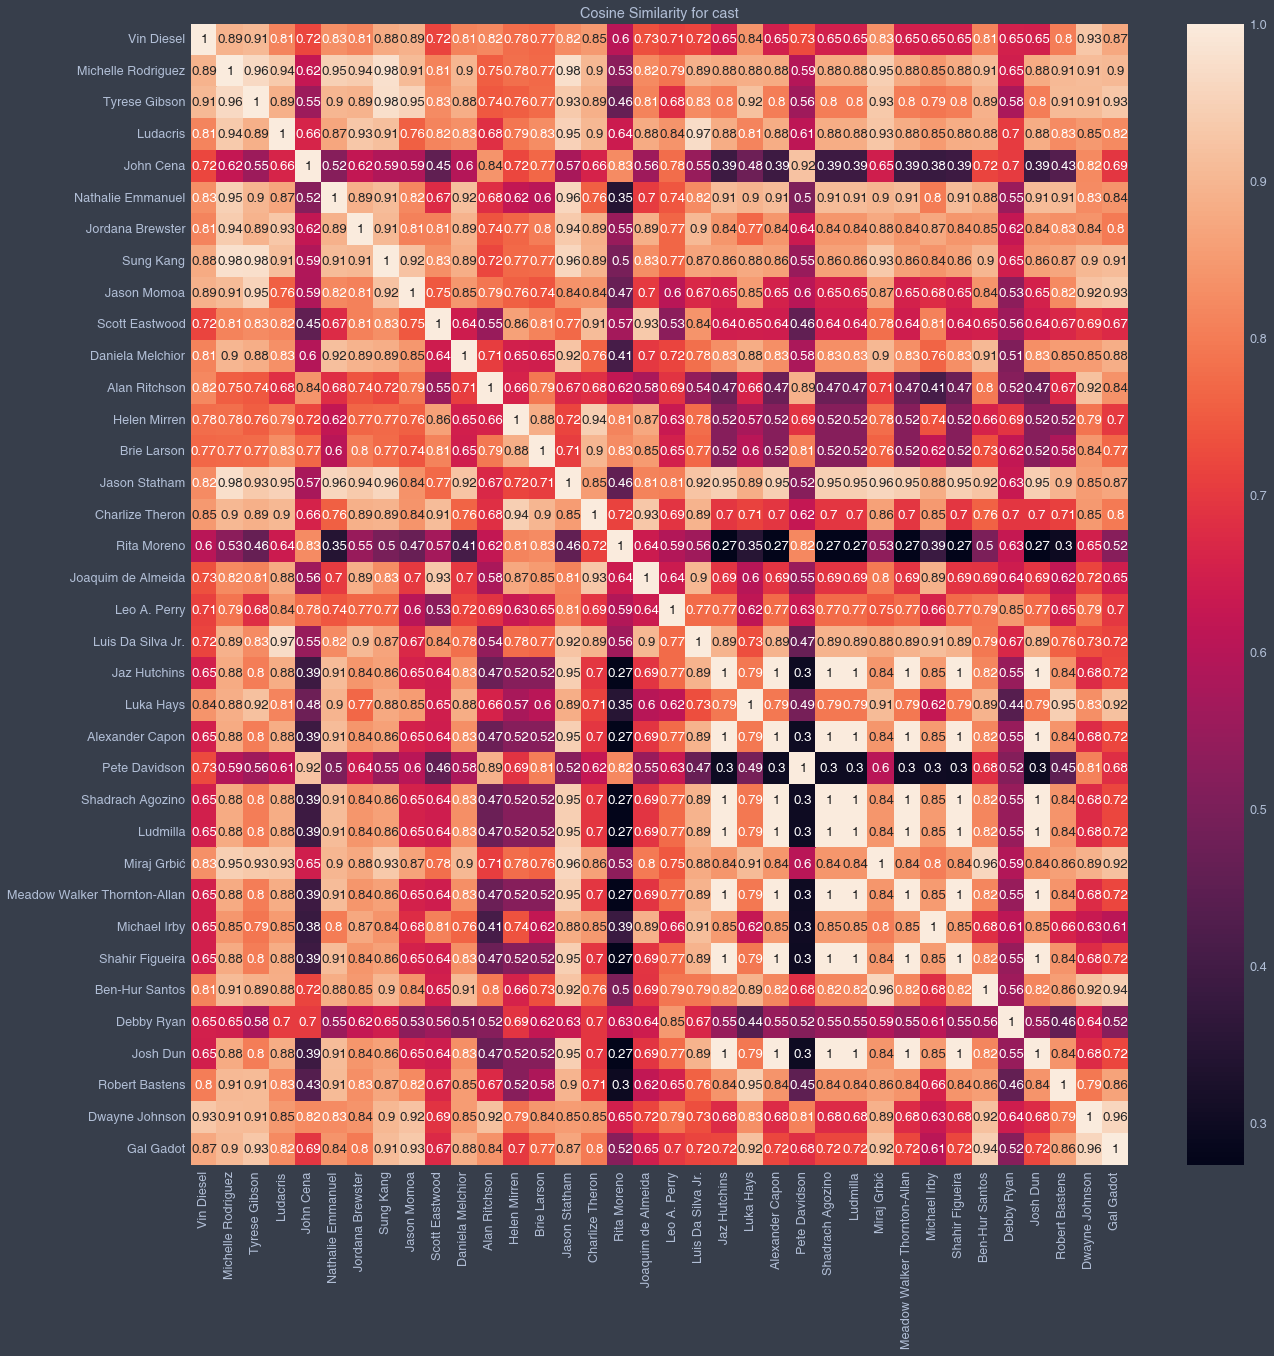

In [40]:
plt.figure(figsize=(21, 21))
sns.heatmap(_id_ua_cs, annot=True)
plt.title('Cosine Similarity for cast')

In [14]:
_id_ua_cs.describe()

,Vin Diesel,Michelle Rodriguez,Tyrese Gibson,Ludacris,John Cena,Nathalie Emmanuel,Jordana Brewster,Sung Kang,Jason Momoa,Scott Eastwood,...,Miraj Grbić,Meadow Walker Thornton-Allan,Michael Irby,Shahir Figueira,Ben-Hur Santos,Debby Ryan,Josh Dun,Robert Bastens,Dwayne Johnson,Gal Gadot
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.770305,0.856041,0.824047,0.843808,0.603544,0.805431,0.825857,0.842566,0.757267,0.708971,...,0.833134,0.764406,0.735731,0.764406,0.808124,0.605753,0.764406,0.758779,0.800062,0.785399
std,0.100861,0.109705,0.125609,0.090745,0.167735,0.152241,0.095763,0.115141,0.129623,0.129008,...,0.108015,0.202930,0.165695,0.202930,0.110848,0.104569,0.202930,0.164166,0.105588,0.122125
min,0.604219,0.527060,0.464239,0.613093,0.383115,0.345271,0.550973,0.496410,0.468705,0.452831,...,0.531975,0.272772,0.302148,0.272772,0.501115,0.435286,0.272772,0.297927,0.633415,0.521178
25%,0.651556,0.818267,0.800601,0.814924,0.448065,0.732929,0.800903,0.829467,0.653701,0.642999,...,0.792461,0.652265,0.645965,0.652265,0.752550,0.547723,0.652265,0.665275,0.676004,0.713373
50%,0.789963,0.882092,0.826331,0.876002,0.593363,0.876206,0.841625,0.864791,0.757614,0.672897,...,0.842701,0.824273,0.800993,0.824273,0.816497,0.585451,0.824273,0.836029,0.824099,0.781866
75%,0.834060,0.908537,0.907117,0.885602,0.718356,0.910980,0.887823,0.906609,0.847934,0.809935,...,0.903351,0.896908,0.849837,0.896908,0.891732,0.647071,0.896908,0.858051,0.893729,0.889454
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
_id_uk_cs

,sequel,revenge,racing,family,cars
sequel,1.000000,0.801752,0.767978,0.769497,0.541304
revenge,0.801752,1.000000,0.673981,0.585817,0.842520
racing,0.767978,0.673981,1.000000,0.833432,0.411476
family,0.769497,0.585817,0.833432,1.000000,0.252751
cars,0.541304,0.842520,0.411476,0.252751,1.000000


In [36]:
_id_ua_uk_cs = cosine_similarity(np.array([_id_ua.sum()]), np.array([_id_uk.sum()]))
_id_ua_uk_cs[0][0]

0.9407268253186853

In [66]:
def cosine_similarity_clf(row):
    _id = row.name
    _id_uk = uk.loc[keywords.loc[_id].to_list()[0][2:-2].split("', '")]
    _id_ua = ua.loc[cast.loc[_id].to_list()[0][2:-2].split("', '")]
    _id_ua_uk_cs = cosine_similarity(np.array([_id_ua.sum()]), np.array([_id_uk.sum()]))
    return _id_ua_uk_cs[0][0]

In [86]:
movies['cast_keywords_cs'] = movies.apply(cosine_similarity_clf, axis=1)

In [88]:
movies.to_csv('data/movies_with_cast_keywords_cs')

In [89]:
movies.head()

,popularity,release_date,title,vote_average,vote_count,genres,cast_keywords_cs
id,,,,,,,
385687,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller",0.940727
697843,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller",0.915606
603692,1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime",0.978290
569094,2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction",0.905432
502356,1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy",0.912828


In [97]:
movies['genres_encoder'] = ug['label_encoder']

In [98]:
movies.head()

,popularity,release_date,title,vote_average,vote_count,genres,cast_keywords_cs,genres_encoder
id,,,,,,,,
385687,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller",0.940727,16
697843,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller",0.915606,16
603692,1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime",0.978290,16
569094,2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction",0.905432,2
502356,1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy",0.912828,2


Text(0, 0.5, 'cast_keywords_cs')

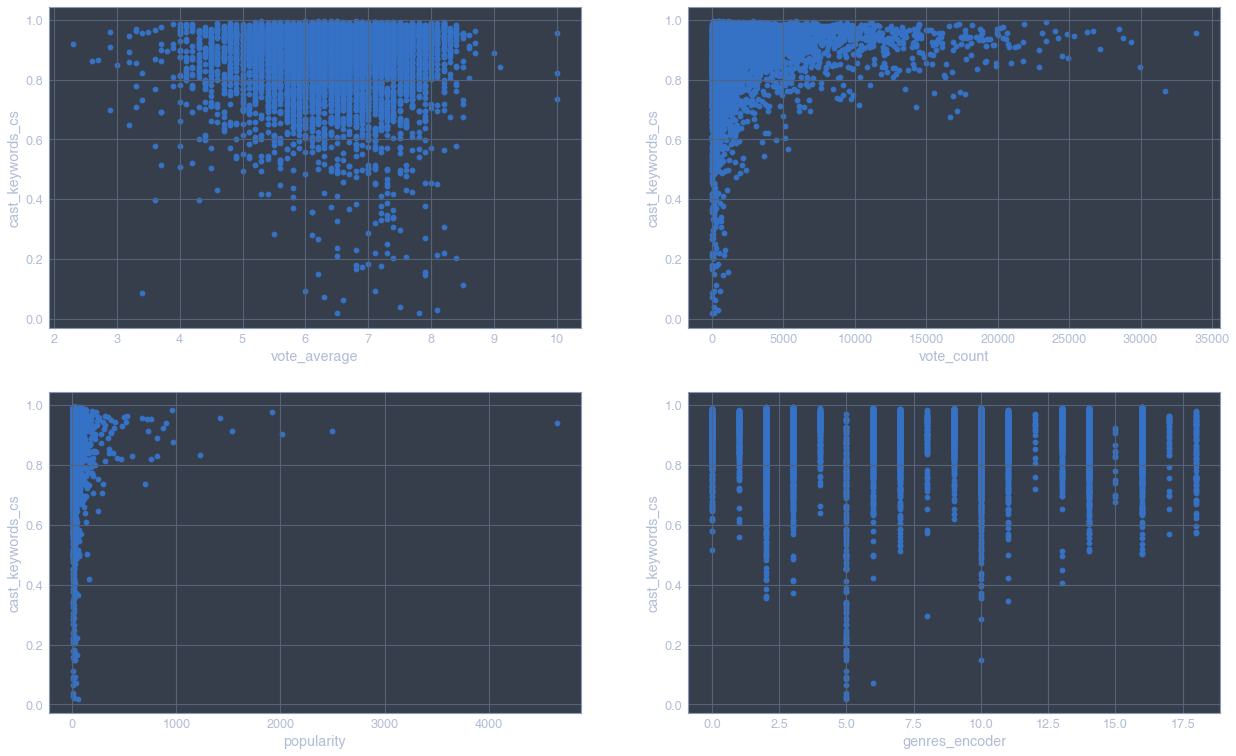

In [100]:
fig, axs = plt.subplots(2, 2, figsize=(21, 13))

axs[0, 0].scatter(movies['vote_average'], movies['cast_keywords_cs'])
axs[0, 0].set_xlabel('vote_average')
axs[0, 0].set_ylabel('cast_keywords_cs')

axs[0, 1].scatter(movies['vote_count'], movies['cast_keywords_cs'])
axs[0, 1].set_xlabel('vote_count')
axs[0, 1].set_ylabel('cast_keywords_cs')

axs[1, 0].scatter(movies['popularity'], movies['cast_keywords_cs'])
axs[1, 0].set_xlabel('popularity')
axs[1, 0].set_ylabel('cast_keywords_cs')

axs[1, 1].scatter(movies['genres_encoder'], movies['cast_keywords_cs'])
axs[1, 1].set_xlabel('genres_encoder')
axs[1, 1].set_ylabel('cast_keywords_cs')

In [3]:
movies = pd.read_csv('data/movies_with_cast_keywords_cs', index_col='id')
movies.head()

,popularity,release_date,title,vote_average,vote_count,genres,cast_keywords_cs
id,,,,,,,
385687,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller",0.940727
697843,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller",0.915606
603692,1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime",0.978290
569094,2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction",0.905432
502356,1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy",0.912828


In [14]:
movies['genres_encoder'] = ug['label_encoder']

In [17]:
movies['genres_label'] = ug['label']

In [18]:
movies[movies['cast_keywords_cs'] < 0.5]

,popularity,release_date,title,vote_average,vote_count,genres,cast_keywords_cs,genres_encoder,genres_label
id,,,,,,,,,
981324,163.715,2023-01-13,Island of the Dolls,5.3,31,Horror,0.418664,10,Horror
16535,64.697,1953-04-11,Titanic,6.5,105,"Drama, Romance",0.496427,6,Drama
1058623,60.696,2023-01-23,The Stroll,6.5,4,Documentary,0.019343,5,Documentary
928773,38.898,2022-01-23,Whisper,6.4,56,"Horror, Thriller",0.373538,10,Horror
984105,55.553,2023-01-02,The Mummy Resurrection,6.7,31,Horror,0.366618,10,Horror
...,...,...,...,...,...,...,...,...,...
338544,11.363,2016-09-09,For the Love of Spock,7.4,154,Documentary,0.338911,5,Documentary
413736,13.209,2016-08-27,Monster High: Welcome to Monster High,6.8,113,"Animation, Family",0.385286,2,Animation
73901,11.168,1999-12-20,Animaniacs: Wakko's Wish,7.1,82,"Animation, Music, Comedy",0.499779,11,Music


Text(0.5, 0, 'cast_keywords_cs')

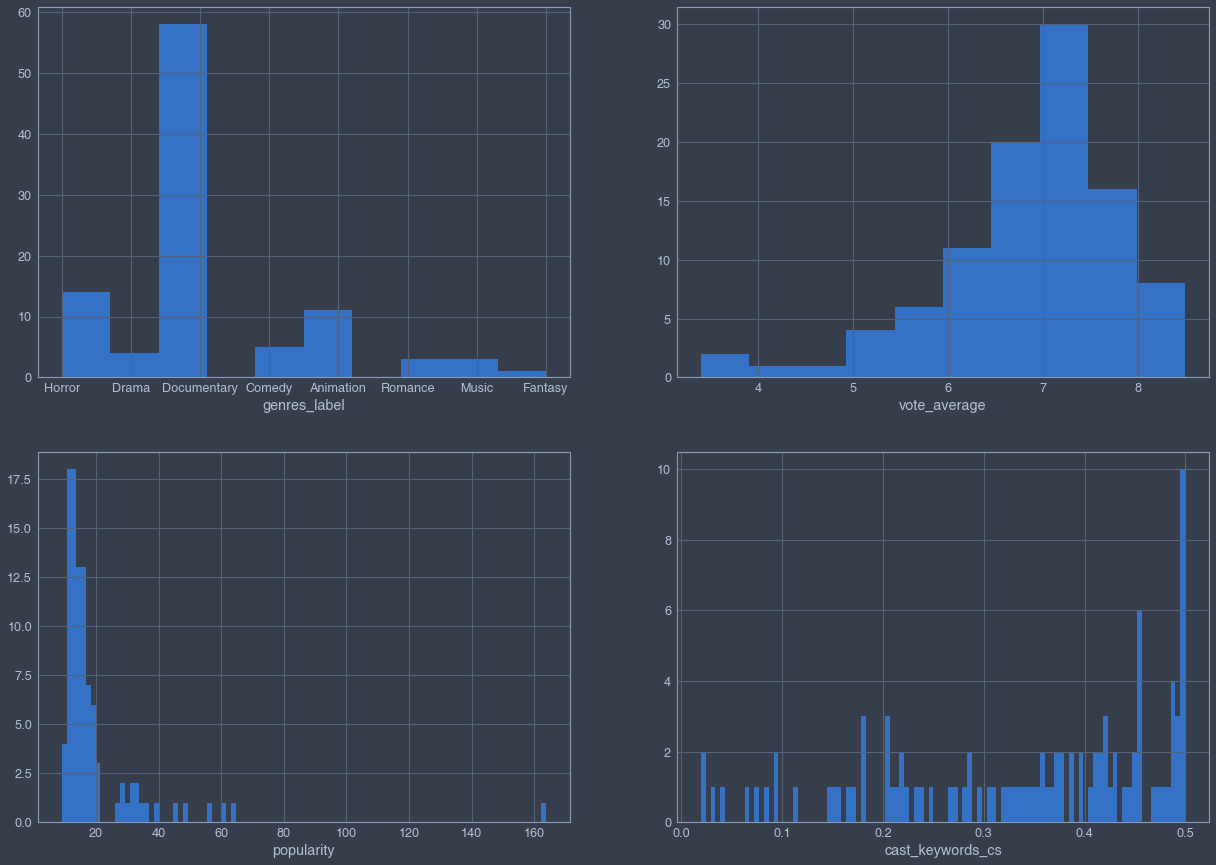

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(21, 15))

axs[0, 0].hist(movies[movies['cast_keywords_cs'] < 0.5]['genres_label'])
axs[0, 0].set_xlabel('genres_label')

axs[0, 1].hist(movies[movies['cast_keywords_cs'] < 0.5]['vote_average'])
axs[0, 1].set_xlabel('vote_average')

axs[1, 0].hist(movies[movies['cast_keywords_cs'] < 0.5]['popularity'], bins=100)
axs[1, 0].set_xlabel('popularity')

axs[1, 1].hist(movies[movies['cast_keywords_cs'] < 0.5]['cast_keywords_cs'], bins=100)
axs[1, 1].set_xlabel('cast_keywords_cs')

Text(0.5, 0, 'cast_keywords_cs')

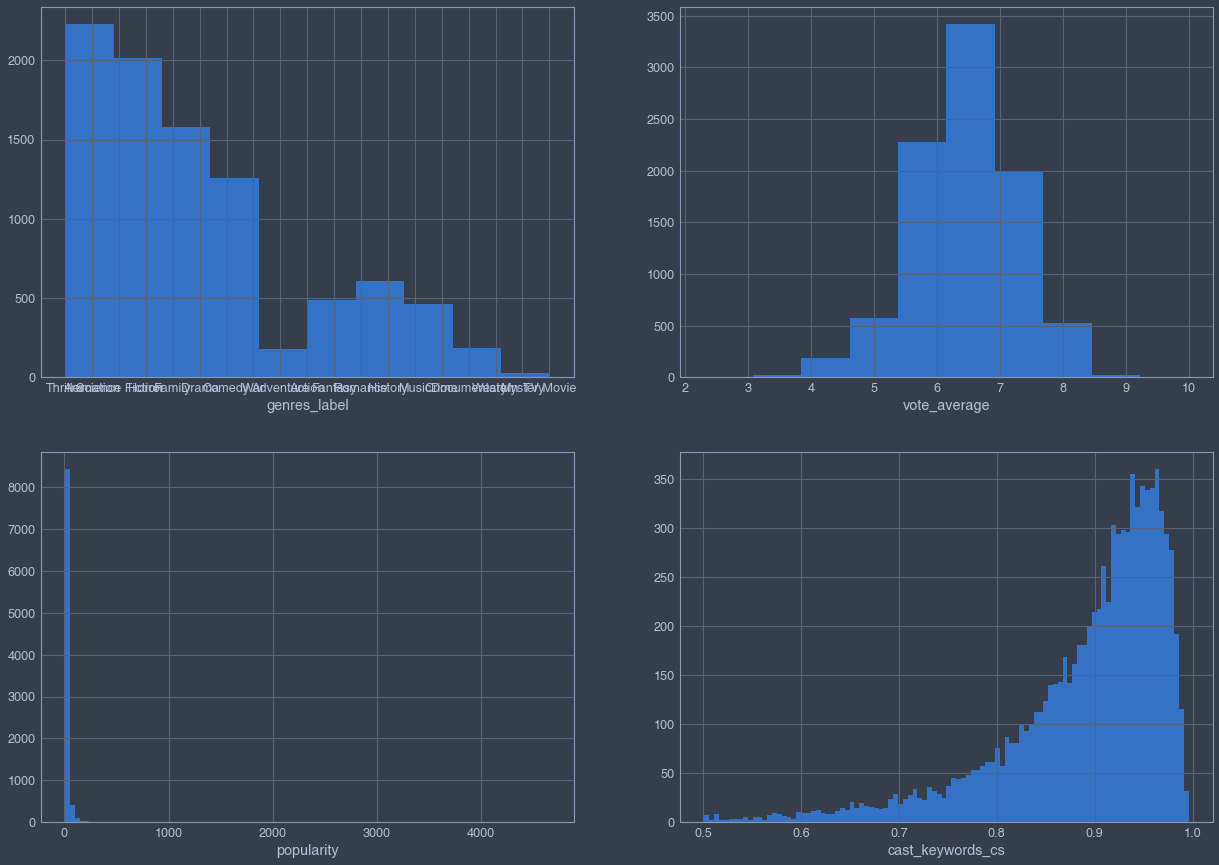

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(21, 15))

axs[0, 0].hist(movies[movies['cast_keywords_cs'] > 0.5]['genres_label'])
axs[0, 0].set_xlabel('genres_label')

axs[0, 1].hist(movies[movies['cast_keywords_cs'] > 0.5]['vote_average'])
axs[0, 1].set_xlabel('vote_average')

axs[1, 0].hist(movies[movies['cast_keywords_cs'] > 0.5]['popularity'], bins=100)
axs[1, 0].set_xlabel('popularity')

axs[1, 1].hist(movies[movies['cast_keywords_cs'] > 0.5]['cast_keywords_cs'], bins=100)
axs[1, 1].set_xlabel('cast_keywords_cs')

In [34]:
like = movies[movies['title'].isin(['Starship Troopers', 'Aliens', 'Pitch Black'])]
like

,popularity,release_date,title,vote_average,vote_count,genres,cast_keywords_cs,genres_encoder,genres_label
id,,,,,,,,,
679,59.005,1986-07-18,Aliens,7.9,8542,"Action, Thriller, Science Fiction",0.852744,14,Science Fiction
563,28.171,1997-11-07,Starship Troopers,7.0,4268,"Adventure, Action, Thriller, Science Fiction",0.947928,14,Science Fiction
2787,14.899,2000-02-18,Pitch Black,6.8,3974,"Thriller, Science Fiction, Action",0.888326,14,Science Fiction


In [40]:
min_rating = like['vote_average'].min()-0.2
cs = like['cast_keywords_cs'].min()-0.02

In [42]:
movies[
    (~movies['title'].isin(['Starship Troopers', 'Aliens', 'Pitch Black']))
    & (movies['vote_average'] >= min_rating)
    & (movies['cast_keywords_cs'] >= cs)
    & (movies['genres_label']=='Science Fiction')
]

,popularity,release_date,title,vote_average,vote_count,genres,cast_keywords_cs,genres_encoder,genres_label
id,,,,,,,,,
667538,1423.735,2023-06-06,Transformers: Rise of the Beasts,7.1,469,"Action, Adventure, Science Fiction",0.958941,14,Science Fiction
298618,965.786,2023-06-13,The Flash,6.7,639,"Science Fiction, Action, Adventure",0.876646,14,Science Fiction
447365,960.044,2023-05-03,Guardians of the Galaxy Vol. 3,8.0,2111,"Action, Science Fiction, Adventure",0.985683,14,Science Fiction
76600,899.251,2022-12-14,Avatar: The Way of Water,7.7,8861,"Science Fiction, Adventure, Action",0.939964,14,Science Fiction
1131438,389.946,2023-06-13,Fear the Invisible Man,7.1,13,"Thriller, Horror, Science Fiction",0.839745,14,Science Fiction
...,...,...,...,...,...,...,...,...,...
9663,11.395,1984-12-13,Starman,6.9,730,"Science Fiction, Romance",0.935258,14,Science Fiction
10133,11.347,2002-10-01,Cypher,6.7,489,"Thriller, Science Fiction",0.972589,14,Science Fiction
565743,12.703,2019-06-01,The Vast of Night,6.6,894,"Mystery, Science Fiction, Thriller, Drama",0.898637,14,Science Fiction
